In [45]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [6]:


test = True
test_size = 'mini'

if test:
    data_file = f'data/{test_size}_example.txt'
else:
    data_file = 'data/input.txt'

with open(data_file, 'r') as file_input:
    lines = file_input.readlines()
    edges = [line.strip().split('-') for line in lines]
    print(edges)


G = nx.Graph()
small_caves = set()

for edge in edges:
    node1, node2 = edge[0], edge[1]
    G.add_edge(node1, node2)
    for node in node1, node2:
        if node.islower():
            small_caves.add(node)

print(G)
print(small_caves)

[['start', 'A'], ['start', 'b'], ['A', 'c'], ['A', 'b'], ['b', 'd'], ['A', 'end'], ['b', 'end']]
Graph with 6 nodes and 7 edges
{'d', 'c', 'b', 'start', 'end'}


In [4]:
G.nodes()

NodeView(('start', 'A', 'b', 'c', 'd', 'end'))

In [5]:
G.nodes['start']

{}

In [7]:
print([path for path in nx.all_simple_paths(G, 'start', 'end')])

[['start', 'A', 'b', 'end'], ['start', 'A', 'end'], ['start', 'b', 'A', 'end'], ['start', 'b', 'end']]


In [8]:
G['start']

AtlasView({'A': {}, 'b': {}})

In [13]:
# Equivalent ways to reference neighbors of a node
print(G['A'])
print(G.adj['A'])
print(G.neighbors('A'))
for n in G.neighbors('A'):
    print(n)

{'start': {}, 'c': {}, 'b': {}, 'end': {}}
{'start': {}, 'c': {}, 'b': {}, 'end': {}}
start
c
b
end


In [14]:
G['start']

AtlasView({'A': {}, 'b': {}})

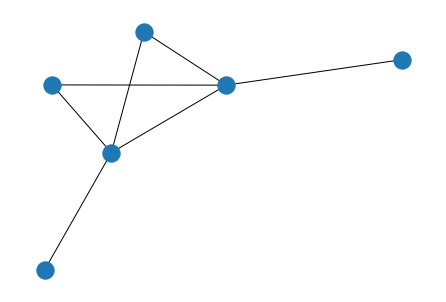

In [15]:
nx.draw(G)

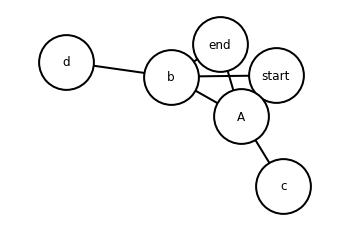

In [20]:
options = {
    "font_size": 12,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}
nx.draw_networkx(G, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [49]:
paths = []

In [55]:
# Initialize partial paths to explore
to_explore = []
for node in G.adj['start']:
    to_explore.append(['start', node])
    
print(to_explore)

[['start', 'A'], ['start', 'b']]


In [56]:
to_explore

[['start', 'A'], ['start', 'b']]

In [57]:
current_path = to_explore.pop()
current_path

['start', 'b']

In [58]:
to_explore

[['start', 'A']]

In [59]:
# Initialize partial paths to explore
to_explore = []
for node in G.adj['start']:
    to_explore.append(['start', node])

while len(to_explore) > 0:
    current_path = to_explore.pop()
    terminal_node = current_path[-1]
    new_neighbors = G.adj[terminal_node]
    for n in new_neighbors:
        if n == 'end':
            complete_path = current_path.append('end')
            paths.append(complete_path)
            print(complete_path)
        else:
            new_partial_path = current_path.append(n)
            if n.isupper() or Counter(new_partial_path)[n] == 0:
                to_explore.append(new_partial_path)

None


TypeError: 'NoneType' object is not subscriptable

In [47]:
visit_counts = Counter(partial_path)
print(visit_counts)
print(visit_counts['b'])

Counter({'start': 1, 'b': 1, 'A': 1})
1


In [ ]:
terminus = partial_path[-1]
if terminus = G.nodes['end']:
    print('reached the end')
    
# Find neighbors of current terminus
term_neighbors = G[terminus]
for node in term_neighbors: